# 확률적 경사 하강법

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier

### pandas DataFrame 생성

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')

### DataFrame 자료를 array 형식으로 변환

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(type(fish)) # class 'pandas.core.frame.DataFrame'
print(type(fish_input))

fish_target = fish['Species'].to_numpy()

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

### 자료의 표준화

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

## mean and std 추정
ss.fit(train_input)

## 정규화
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
from sklearn.linear_model import SGDClassifier

In [8]:
# loss='log': logistic loss function, max_iter=10 : epoch 횟수

sc = SGDClassifier(loss='log', max_iter=10, random_state=42) 
# SGDClassifier(
#     loss='hinge',  -> default hinge -> svm
#     *,

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [ ]:
### 훈련한 모델의 파라메터를 이어서 학습

In [9]:
sc.partial_fit(train_scaled, train_target) 
# partial_fit  -> max_iter이 작을경우 수렴하지 않아서 에러가 나는데 그떄 이어서 하기 
# 보통 max_iter를 조절한다.

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


## 에포크와 과대/과소적합

In [10]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

# print(np.shape(train_scaled))
# print(train_target)
# print(classes)

In [11]:
# 임시변수 ' -'

for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
#     sc.partial_fit(train_scaled, train_target)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

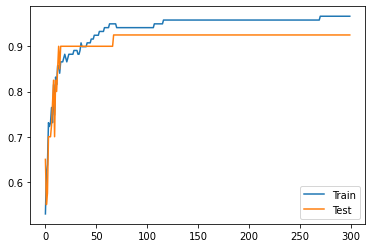

In [12]:
import matplotlib.pyplot as plt

plt.plot(train_score, label = "Train")
plt.plot(test_score, label = "Test")
plt.legend()
plt.show()

### Epoch의 수를 100으로 설정하고 실행

In [13]:
### The stoping criterion (loss > best_loss - tol) 차이 기준 10^-3
 
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


## Hinge loss (SVM) 를 이용한 SGDClassifier

In [17]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
